In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.externals import joblib #, pickle (both are used to preserve trained ML model)
from matplotlib import pyplot as plt # visulization purposes, more basic
import seaborn as sns                # sits on top o fmatplotlib to make fantastic visulization
import joblib                        

%matplotlib inline 

%pwd

'/Users/lujin/Dropbox/NEU/2019 Spring/6105 Data Science/final-project/6105data-science/raw'

In [2]:
my_path='/Users/lujin/Dropbox/NEU/2019 Spring/6105 Data Science/final-project/6105data-science/raw'

# my_df is a dataframe
bj_df = pd.read_csv(f'{my_path}/BeijingPM20100101_20151231.csv')
# f is for Python 3
# all the csv is now in my_df, both rows and columns

print(bj_df.shape)
# print the number of rows and columns

bj_df.head(3)
# to get the top 3 rows

(52584, 18)


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0


In [3]:
# change "cv"" in cbwd to "SW"
bj_df['cbwd'] = bj_df['cbwd'].replace('cv', 'SW')
bj_df.head(30)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


In [4]:
# 52584 * 0.7 = 36808
# 52584 * 0.3 = 15776
# 15776 * 0.5 = 7888
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

bjdf_train_valid,bjdf_test = mydf_splitter(bj_df,44696)
# split into 2 dataframes
# to keep aside some data that the model will not be ablt to see


print(bjdf_train_valid.shape,bjdf_test.shape)

(44696, 18) (7888, 18)


No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27386
PM_Dongsihuan      28834
PM_Nongzhanguan    27376
PM_US Post          2074
DEWP                   0
HUMI                   0
PRES                   0
TEMP                   0
cbwd                   0
Iws                    0
precipitation         26
Iprec                 26
dtype: int64


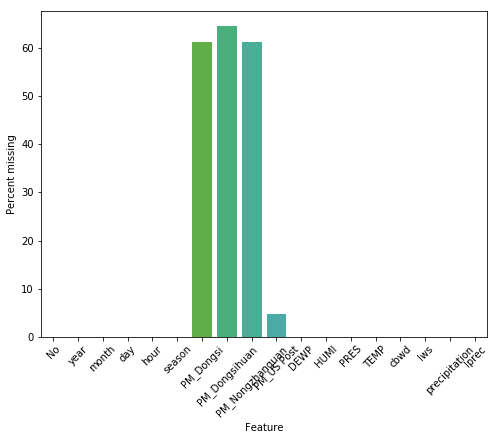

In [5]:
# the percentage of null values
null_vals = bjdf_train_valid.isnull().sum()/len(bjdf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)

# https://seaborn.pydata.org/ for referrences
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

print(bjdf_train_valid.isnull().sum())
# Show the columns which contain null value
# PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan, PM_US Post, previpitation, Iprec

In [6]:
# Drop 3 columns which contain the PM results that we do not care

print(bjdf_train_valid.shape)

bjdf_train_valid_2 = bjdf_train_valid.drop(["PM_Dongsi", "PM_Dongsihuan", "PM_Nongzhanguan"],axis = 1)
print(bjdf_train_valid_2.shape)
bjdf_train_valid_2.head(2)

(44696, 18)
(44696, 15)


,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0


In [7]:
#Check types of each column with the dataframe info () method
bjdf_train_valid_2.info()
# .info() the formats of the column
# object cannot be used for ML -> need to be changed to categorical types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 15 columns):
No               44696 non-null int64
year             44696 non-null int64
month            44696 non-null int64
day              44696 non-null int64
hour             44696 non-null int64
season           44696 non-null int64
PM_US Post       42622 non-null float64
DEWP             44696 non-null float64
HUMI             44696 non-null float64
PRES             44696 non-null float64
TEMP             44696 non-null float64
cbwd             44696 non-null object
Iws              44696 non-null float64
precipitation    44670 non-null float64
Iprec            44670 non-null float64
dtypes: float64(8), int64(6), object(1)
memory usage: 5.1+ MB


In [8]:
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [9]:
bjdf_train_valid_3 = str_to_cat(bjdf_train_valid_2)
print()

In [10]:
#Check dtypes of columns after this operation
bjdf_train_valid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 15 columns):
No               44696 non-null int64
year             44696 non-null int64
month            44696 non-null int64
day              44696 non-null int64
hour             44696 non-null int64
season           44696 non-null int64
PM_US Post       42622 non-null float64
DEWP             44696 non-null float64
HUMI             44696 non-null float64
PRES             44696 non-null float64
TEMP             44696 non-null float64
cbwd             44696 non-null category
Iws              44696 non-null float64
precipitation    44670 non-null float64
Iprec            44670 non-null float64
dtypes: category(1), float64(8), int64(6)
memory usage: 4.8 MB


In [11]:
'''Check the cateogry mapping for cbwd column. We need this
later'''
print(bjdf_train_valid_3.cbwd.cat.categories)

#print(bjdf_train_valid_3['PM_US Post'])

Index(['NE', 'NW', 'SE', 'SW'], dtype='object')


In [12]:
'''Define impute functions. Impute categorical NaNs with -1, 
where we add 1 to make it 0. For each 
continuous variables, we impute missing values with median values of that
column, and for every variable
where any rows were imputed, add a separate 'imputed or not' column'''

'''
Null categorical columns: cbwd, PM_US Post_cat
Null continuous columns: PM_US Post, precipitation, Iprec
'''

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   



def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items():
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [13]:
bjdf_train_valid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 15 columns):
No               44696 non-null int64
year             44696 non-null int64
month            44696 non-null int64
day              44696 non-null int64
hour             44696 non-null int64
season           44696 non-null int64
PM_US Post       42622 non-null float64
DEWP             44696 non-null float64
HUMI             44696 non-null float64
PRES             44696 non-null float64
TEMP             44696 non-null float64
cbwd             44696 non-null category
Iws              44696 non-null float64
precipitation    44670 non-null float64
Iprec            44670 non-null float64
dtypes: category(1), float64(8), int64(6)
memory usage: 4.8 MB


In [14]:
bjdf_train_valid_4,bj_table = mydf_preprocessor(bjdf_train_valid_3,null_table = None)

In [15]:
bjdf_train_valid_4.head(25)

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_US Post_na,precipitation_na,Iprec_na
0,1,2010,1,1,0,4,73.0,-21.0,43.0,1021.0,-11.0,2,1.79,0.0,0.0,True,False,False
1,2,2010,1,1,1,4,73.0,-21.0,47.0,1020.0,-12.0,2,4.92,0.0,0.0,True,False,False
2,3,2010,1,1,2,4,73.0,-21.0,43.0,1019.0,-11.0,2,6.71,0.0,0.0,True,False,False
3,4,2010,1,1,3,4,73.0,-21.0,55.0,1019.0,-14.0,2,9.84,0.0,0.0,True,False,False
4,5,2010,1,1,4,4,73.0,-20.0,51.0,1018.0,-12.0,2,12.97,0.0,0.0,True,False,False
5,6,2010,1,1,5,4,73.0,-19.0,47.0,1017.0,-10.0,2,16.10,0.0,0.0,True,False,False
6,7,2010,1,1,6,4,73.0,-19.0,44.0,1017.0,-9.0,2,19.23,0.0,0.0,True,False,False
7,8,2010,1,1,7,4,73.0,-19.0,44.0,1017.0,-9.0,2,21.02,0.0,0.0,True,False,False
8,9,2010,1,1,8,4,73.0,-19.0,44.0,1017.0,-9.0,2,24.15,0.0,0.0,True,False,False
9,10,2010,1,1,9,4,73.0,-20.0,37.0,1017.0,-8.0,2,27.28,0.0,0.0,True,False,False


In [16]:
'''Please store the null_table, category mapping separately.
We will need to process the test dataset using these values'''
bj_table

{'PM_US Post': 73.0, 'precipitation': 0.0, 'Iprec': 0.0}

In [17]:
# categorize the PM 2.5 into 6 categories
#    PM 2.5    -    Category
#   [0, 35]            1
#   (35, 75]           2
#  (75, 115]           3
# (115, 150]           4
# (150, 250]           5
# (250 -               6
bjdf_train_valid_4['PM_US Post_cat'] = pd.cut(bjdf_train_valid_3['PM_US Post'],
                                              [-1,35,75,115,150,250,float("inf")],
                                              labels=[1,2,3,4,5,6])
#print(bjdf_train_valid_4['PM_US Post'], bjdf_train_valid_4['PM_US Post_cat'])
#bjdf_train_valid_4.info()
print(bjdf_train_valid_4['PM_US Post_cat'].cat.categories)

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')


In [18]:
bjdf_train_valid_4.head(25)

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_US Post_na,precipitation_na,Iprec_na,PM_US Post_cat
0,1,2010,1,1,0,4,73.0,-21.0,43.0,1021.0,-11.0,2,1.79,0.0,0.0,True,False,False,2
1,2,2010,1,1,1,4,73.0,-21.0,47.0,1020.0,-12.0,2,4.92,0.0,0.0,True,False,False,2
2,3,2010,1,1,2,4,73.0,-21.0,43.0,1019.0,-11.0,2,6.71,0.0,0.0,True,False,False,2
3,4,2010,1,1,3,4,73.0,-21.0,55.0,1019.0,-14.0,2,9.84,0.0,0.0,True,False,False,2
4,5,2010,1,1,4,4,73.0,-20.0,51.0,1018.0,-12.0,2,12.97,0.0,0.0,True,False,False,2
5,6,2010,1,1,5,4,73.0,-19.0,47.0,1017.0,-10.0,2,16.10,0.0,0.0,True,False,False,2
6,7,2010,1,1,6,4,73.0,-19.0,44.0,1017.0,-9.0,2,19.23,0.0,0.0,True,False,False,2
7,8,2010,1,1,7,4,73.0,-19.0,44.0,1017.0,-9.0,2,21.02,0.0,0.0,True,False,False,2
8,9,2010,1,1,8,4,73.0,-19.0,44.0,1017.0,-9.0,2,24.15,0.0,0.0,True,False,False,2
9,10,2010,1,1,9,4,73.0,-20.0,37.0,1017.0,-8.0,2,27.28,0.0,0.0,True,False,False,2


In [19]:
'''Now, let's separate the X and Y variables (vertical split of the 
dataframe). Here the Y column is the variable we are trying to predict, 
survived or not(0 = No, 1 = Yes)'''

Y = bjdf_train_valid_4["PM_US Post_cat"]
X = bjdf_train_valid_4.drop(["PM_US Post_cat"],axis = 1)


print(X.shape,Y.shape,bjdf_train_valid_4.shape)

(44696, 18) (44696,) (44696, 19)


In [20]:
bjdf_train_valid_4.info()
print(bjdf_train_valid_4.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 19 columns):
No                  44696 non-null int64
year                44696 non-null int64
month               44696 non-null int64
day                 44696 non-null int64
hour                44696 non-null int64
season              44696 non-null int64
PM_US Post          44696 non-null float64
DEWP                44696 non-null float64
HUMI                44696 non-null float64
PRES                44696 non-null float64
TEMP                44696 non-null float64
cbwd                44696 non-null int8
Iws                 44696 non-null float64
precipitation       44696 non-null float64
Iprec               44696 non-null float64
PM_US Post_na       44696 non-null bool
precipitation_na    44696 non-null bool
Iprec_na            44696 non-null bool
PM_US Post_cat      44696 non-null category
dtypes: bool(3), category(1), float64(8), int64(6), int8(1)
memory usage: 5.0 MB
(44696, 19)


In [21]:
'''Note that the different continuous variable columns of this dataframe 
have numbers in different ranges. For example, the Fare and age columns. 
For some machine learning algorithms like Decision Trees and 
their ensembles (Random Forests, for example) the above X and Y
can be directly used as input (They are immune to preprocessing). 

However, for a lot of other ML algorithms 
like K nearest neighbors (KNN), we need to scale the continuous variables 
so that their values are mapped to a number between 0 and 1. 
Let's split this dataframe into continuous variable 
columns and those with categorical variables. We will leave 
the categorical variables untouched because their 
values are treated as different levels and its kind of meaningless to
scale them'''

# remove 'PM_US Post' and 'PM_US Post_na' as we have used 'PM_US Post_cat' to replace it
X = X.drop(['PM_US Post', 'PM_US Post_na', 'No'],  axis = 1)
X_cat = X[['year', 'month', 'day', 'hour', 'season', "cbwd",
           'precipitation_na', 'Iprec_na']]
X_con = X.drop(X_cat,axis = 1)
print(X_cat.shape,X_con.shape)
print(X_con)

(44696, 8) (44696, 7)
       DEWP  HUMI    PRES  TEMP     Iws  precipitation  Iprec
0     -21.0  43.0  1021.0 -11.0    1.79            0.0    0.0
1     -21.0  47.0  1020.0 -12.0    4.92            0.0    0.0
2     -21.0  43.0  1019.0 -11.0    6.71            0.0    0.0
3     -21.0  55.0  1019.0 -14.0    9.84            0.0    0.0
4     -20.0  51.0  1018.0 -12.0   12.97            0.0    0.0
5     -19.0  47.0  1017.0 -10.0   16.10            0.0    0.0
6     -19.0  44.0  1017.0  -9.0   19.23            0.0    0.0
7     -19.0  44.0  1017.0  -9.0   21.02            0.0    0.0
8     -19.0  44.0  1017.0  -9.0   24.15            0.0    0.0
9     -20.0  37.0  1017.0  -8.0   27.28            0.0    0.0
10    -19.0  37.0  1017.0  -7.0   31.30            0.0    0.0
11    -18.0  35.0  1017.0  -5.0   34.43            0.0    0.0
12    -19.0  32.0  1015.0  -5.0   37.56            0.0    0.0
13    -18.0  30.0  1015.0  -3.0   40.69            0.0    0.0
14    -18.0  28.0  1014.0  -2.0   43.82         

In [22]:
bjdf_train_valid_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 19 columns):
No                  44696 non-null int64
year                44696 non-null int64
month               44696 non-null int64
day                 44696 non-null int64
hour                44696 non-null int64
season              44696 non-null int64
PM_US Post          44696 non-null float64
DEWP                44696 non-null float64
HUMI                44696 non-null float64
PRES                44696 non-null float64
TEMP                44696 non-null float64
cbwd                44696 non-null int8
Iws                 44696 non-null float64
precipitation       44696 non-null float64
Iprec               44696 non-null float64
PM_US Post_na       44696 non-null bool
precipitation_na    44696 non-null bool
Iprec_na            44696 non-null bool
PM_US Post_cat      44696 non-null category
dtypes: bool(3), category(1), float64(8), int64(6), int8(1)
memory usage: 5.0 MB


In [23]:
'''Scale the continuous variables. To standardize (includes scaling), 
we subtract mean of that column from every value, then divide the results 
by the variable's standard deviation. There are different ways to 
standardize. Please see preprocessing under scikit-leanr page'''

scaler = preprocessing.StandardScaler().fit(X_con)
X_con_sc = pd.DataFrame(scaler.transform(X_con))
X_con_sc.columns = ["DEWP", "HUMI", "PRES", "TEMP", "Iws", "precipitation","Iprec"]
print(X_con_sc.shape)
X_con_sc.head(2)

(44696, 7)


,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,-1.555663,-0.42656,0.417439,-1.89405,-0.440989,-0.075087,-0.084055
1,-1.555663,-0.27242,0.320716,-1.97575,-0.378224,-0.075087,-0.084055


In [24]:
'''Store this scaler variable or its mean and SD (standard deviation), 
by pickling or something; we need to use the same mean and SD scaler 
later while pre-processing the test set. Now, let's join the cateogrical 
and scaled continuous variables, back together into one dataframe'''

df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full.head(2)

(44696, 15)


,year,month,day,hour,season,cbwd,precipitation_na,Iprec_na,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,2010,1,1,0,4,2,False,False,-1.555663,-0.42656,0.417439,-1.89405,-0.440989,-0.075087,-0.084055
1,2010,1,1,1,4,2,False,False,-1.555663,-0.27242,0.320716,-1.97575,-0.378224,-0.075087,-0.084055


In [32]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44696 entries, 0 to 44695
Data columns (total 15 columns):
year                44696 non-null int64
month               44696 non-null int64
day                 44696 non-null int64
hour                44696 non-null int64
season              44696 non-null int64
cbwd                44696 non-null int8
precipitation_na    44696 non-null bool
Iprec_na            44696 non-null bool
DEWP                44696 non-null float64
HUMI                44696 non-null float64
PRES                44696 non-null float64
TEMP                44696 non-null float64
Iws                 44696 non-null float64
precipitation       44696 non-null float64
Iprec               44696 non-null float64
dtypes: bool(2), float64(7), int64(5), int8(1)
memory usage: 4.2 MB


In [25]:
'''Then, split into train and valid sets for model building 
and hyperparameter tuning, respectively !Remember, we need to 
split (horizontally the rows) X_full into train and validation sets.
We use the dataframe splitter function we defined previously.
Strictly for later use in another module, merge X and Y and store.
Save it as train data. Reason explained in module III'''

X_train,X_valid = mydf_splitter(X_full,36808)
Y_train,Y_valid = mydf_splitter(Y,36808)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(36808, 15) (7888, 15) (36808,) (7888,)


In [26]:
'''Time for training the model and evaluating it on the validation set. 
At first, let's use the default values for the kNN hyperparameters -
n_neighbors = 3,weights = 'uniform'). KNN has more hyperparameters such as
leaf_size, metric, etc. But, these two are key hyperparamters'''

my_knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
# 5 is the default value
my_knn_model.fit(X_train,Y_train)
# .fit() is to train the data

#Predict on the validation set
Y_pred = my_knn_model.predict(X_valid)

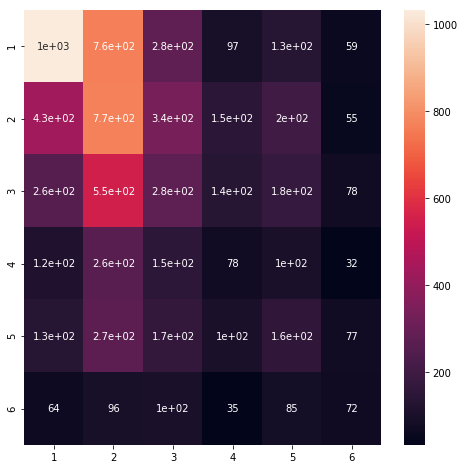

In [27]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["1","2", "3", "4", "5", "6"],
            yticklabels = ["1","2", "3","4","5","6"],annot = True)

In [28]:
print(accuracy_score(Y_valid,Y_pred),
      matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred, average='micro'))

#An MCC of -0.0474 looks bad !We need to do model tuning or 
#hyperparameter tuning to try to make it better

0.30273833671399597 0.11208411180425602 0.30273833671399597


Hyperparameter tuning

In [35]:
'''We chose a value of K = 5 here. But how do we know if that's the right 
value? We need to do hyper parameter tuning. That is, we need to check 
different values of K and find out performance scores for each on the 
validation set! We will pick the value of K that gives the best 
validation set accuracy and use that value of K to predict on the
test set, which we have kept aside'''

from sklearn.metrics import accuracy_score

num_neighs = list()
accuracy_list = list()


for neighbor in range(50,80):
    my_knn_model = KNeighborsClassifier(n_neighbors = neighbor,weights = 'uniform')
    my_knn_model.fit(X_train,Y_train)
    Y_pred = my_knn_model.predict(X_valid)
    accuracy = accuracy_score(Y_valid,Y_pred)
    num_neighs.append(neighbor)
    accuracy_list.append(accuracy)


In [36]:
eval_df =  pd.DataFrame({"Num of neighbors": num_neighs,"Valid accuracy Score": accuracy_list})
eval_df

,Num of neighbors,Valid accuracy Score
0,50,0.347870
1,51,0.348504
2,52,0.347743
3,53,0.346349
4,54,0.346602
5,55,0.346222
6,56,0.345208
7,57,0.344701
8,58,0.344447
9,59,0.343687


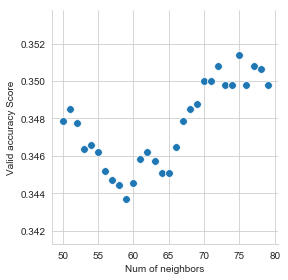

In [37]:
#Plot accuracy Vs validation set accuracy of the model
sns.set_style("whitegrid")
sns.pairplot(eval_df,x_vars = "Num of neighbors",
             y_vars = "Valid accuracy Score",plot_kws = {'s': 60},height = 4.0)

In [38]:
'''Congrats, K = 75 seems to give the best validation set accuracy (= 0.35) !!! So, let's turn to the test set
and use K = 75 for that !OK, so how do we save this trained and 
hyperparameter tuned model for later use? First, we club together, the
train and valid set. We already have this dataframe. Then, we make and 
train a model with K = 14. Then save it with joblib, which we imported 
earlier'''


knn_model_fin = KNeighborsClassifier(n_neighbors = 75,weights = 'uniform')
knn_model_fin.fit(X_full,Y)

!mkdir knn_model
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

['/Users/lujin/Dropbox/NEU/2019 Spring/6105 Data Science/final-project/6105data-science/raw/knn_model/knn_model_final.sav']